# Flight Quicklook : L2

Clean data and combine and generate csv

In [5]:
import h5py
import numpy as np
import os
import glob
from datetime import datetime, timezone
import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate as interp
import matplotlib.dates as mdates
import geopandas as gpd

In [6]:
pattern = "*_L2.h5"
folder_path = "/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/CPU_data/230827/tracker/"
excel_path = "/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/GrapeCompairFlightData.xlsx"

In [7]:
matching_files =sorted(glob.glob(os.path.join(folder_path, pattern)))

In [8]:
matching_files

['/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/CPU_data/230827/tracker/1693125677_L2.h5',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/CPU_data/230827/tracker/1693135845_L2.h5',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/CPU_data/230827/tracker/1693148789_L2.h5',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/CPU_data/230827/tracker/1693150591_L2.h5',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/CPU_data/230827/tracker/1693152391_L2.h5',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/CPU_data/230827/tracker/1693154191_L2.h5',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/CPU_data/230827/tracker/1693155991_L2.h5',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/CPU_data/230827/tracker/1693157791_L2.h5',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/CPU_data/230827/tracker/1693159591_L2.h5',
 

# Check keys and data available

In [9]:
tfile = matching_files[0]

In [10]:
file = h5py.File(tfile,'r')

In [11]:
file.keys()

<KeysViewHDF5 ['Calibration', 'layer00', 'layer01', 'layer02', 'layer03', 'layer04', 'layer05', 'layer06', 'layer07', 'layer09']>

In [12]:
file['layer00'].keys()

<KeysViewHDF5 ['config', 'data', 'vdata']>

In [13]:
file['layer00/vdata'].keys()

<KeysViewHDF5 ['channel_cm_sub', 'channel_data', 'nrg', 'sig_arr']>

In [14]:
file['layer00/data'].keys()

<KeysViewHDF5 ['asic00', 'asic01', 'asic02', 'asic03', 'asic04', 'asic05', 'asic06', 'asic07', 'asic08', 'asic09', 'asic10', 'asic11', 'event_count', 'event_id', 'gps_pps_count', 'layer_number', 'live_time', 'packet_size', 'packet_tail', 'packet_type', 'pl_data_header', 'running_time', 'sync_index', 'system_time', 'tbd', 'time_since_last_pps_pulse', 'triggering_condition', 'vata_ro_ena']>

In [15]:
file['layer00/data/triggering_condition'][:2]

array([1, 1], dtype=uint8)

In [16]:
file['layer00/vdata'].keys()

<KeysViewHDF5 ['channel_cm_sub', 'channel_data', 'nrg', 'sig_arr']>

# Combine per layer data and get a DF

In [17]:
layer_list = ['layer00','layer01','layer02','layer03','layer04','layer05','layer06','layer07','layer08','layer09']

In [18]:
l0sync_index = file['layer00/data/sync_index']
l0_evt = file['layer00/data/event_count'][...][l0sync_index]
evt_time = file['layer00/data/system_time'][...][l0sync_index]/1e9

l1sync_index = file['layer01/data/sync_index']
l1_evt = file['layer01/data/event_count'][...][l1sync_index]

l2sync_index = file['layer02/data/sync_index']
l2_evt = file['layer02/data/event_count'][...][l2sync_index]

l9sync_index = file['layer09/data/sync_index']
l9_evt = file['layer09/data/event_count'][...][l9sync_index]

# evt_time = file['layer01/data/system_time'][...][l1sync_index]/1e9


df = pd.DataFrame()
df['time'] = evt_time
df['l0_evt'] = l0_evt
df['l1_evt'] = l1_evt
df['l2_evt'] = l2_evt
df['l9_evt'] = l9_evt
df['time'] = pd.to_datetime(df['time'],unit='s')

df['l0_evt_cnt'] = df['l0_evt'].diff()
df['l1_evt_cnt'] = df['l1_evt'].diff()
df['l2_evt_cnt'] = df['l2_evt'].diff()
df['l9_evt_cnt'] = df['l9_evt'].diff()


In [19]:
df['time'][0:5]

0   2023-08-27 08:41:19.439985408
1   2023-08-27 08:41:19.487980032
2   2023-08-27 08:41:19.518771456
3   2023-08-27 08:41:19.519056640
4   2023-08-27 08:41:19.525303552
Name: time, dtype: datetime64[ns]

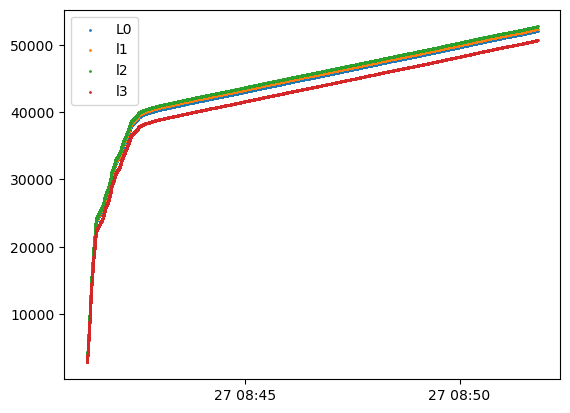

In [20]:
plt.scatter(df['time'],df['l0_evt'],s=1,label='L0')
plt.scatter(df['time'],df['l1_evt'],s=1,label='l1')
plt.scatter(df['time'],df['l2_evt'],s=1,label='l2')
plt.scatter(df['time'],df['l9_evt'],s=1,label='l9')
plt.legend()

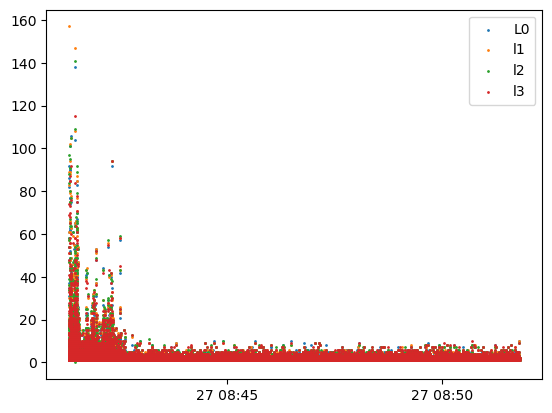

In [21]:
plt.scatter(df['time'],df['l0_evt_cnt'],s=1,label='L0')
plt.scatter(df['time'],df['l1_evt_cnt'],s=1,label='l1')
plt.scatter(df['time'],df['l2_evt_cnt'],s=1,label='l2')
plt.scatter(df['time'],df['l9_evt_cnt'],s=1,label='l3')
plt.legend()

In [22]:
pd.to_datetime(df['time'],unit='s')

0       2023-08-27 08:41:19.439985408
1       2023-08-27 08:41:19.487980032
2       2023-08-27 08:41:19.518771456
3       2023-08-27 08:41:19.519056640
4       2023-08-27 08:41:19.525303552
                     ...             
14519   2023-08-27 08:51:48.224056576
14520   2023-08-27 08:51:48.246392064
14521   2023-08-27 08:51:48.490068992
14522   2023-08-27 08:51:48.565643520
14523   2023-08-27 08:51:48.825616896
Name: time, Length: 14524, dtype: datetime64[ns]

In [23]:
grouped_df = df.groupby(pd.Grouper(key='time',freq='10s')).agg({
    'time':'first',
    **{col: 'mean' for col in df.columns if col.endswith('evt_cnt')}, 
})
grouped_df.info(), df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64 entries, 2023-08-27 08:41:10 to 2023-08-27 08:51:40
Freq: 10S
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   time        64 non-null     datetime64[ns]
 1   l0_evt_cnt  64 non-null     float64       
 2   l1_evt_cnt  64 non-null     float64       
 3   l2_evt_cnt  64 non-null     float64       
 4   l9_evt_cnt  64 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14524 entries, 0 to 14523
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   time        14524 non-null  datetime64[ns]
 1   l0_evt      14524 non-null  uint32        
 2   l1_evt      14524 non-null  uint32        
 3   l2_evt      14524 non-null  uint32        
 4   l9_evt      14524 non-null  uint32        
 5   l0_evt

(None, None)

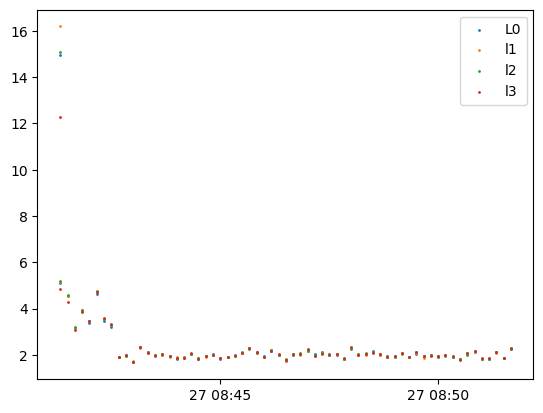

In [24]:
plt.scatter(grouped_df['time'],grouped_df['l0_evt_cnt'],s=1,label='L0')
plt.scatter(grouped_df['time'],grouped_df['l1_evt_cnt'],s=1,label='l1')
plt.scatter(grouped_df['time'],grouped_df['l2_evt_cnt'],s=1,label='l2')
plt.scatter(grouped_df['time'],grouped_df['l9_evt_cnt'],s=1,label='l3')
plt.legend()

In [25]:
# plt.scatter(grouped_df['time'],grouped_df['l0_evt'].diff())

In [26]:
# Create a dictionary to store arrays for both event_count and event_time
layer_data = {layer: {'event_count': np.array([], dtype=int), 'live_time':np.array([])} for layer in layer_list}
layer_data['event_time'] = np.array([])
layer_data['event_id'] = np.array([])
for tfile in matching_files:
    with h5py.File(tfile,'r') as file:
        
        for layer in layer_list:
            if layer in file.keys():
                sync_ind = file[f'{layer}/data/sync_index'][...]
                
                event_count = file[f'{layer}/data/event_count'][...][sync_ind]
                layer_data[layer]['event_count'] = np.concatenate([layer_data[layer]['event_count'], event_count])
        
                live_time = file[f'{layer}/data/event_count'][...][sync_ind]
                layer_data[layer]['live_time'] = np.concatenate([layer_data[layer]['live_time'], live_time])
        
                event_time = file[f'{layer}/data/system_time'][...][sync_ind]/1e9
                event_id = file[f'{layer}/data/event_id'][...][sync_ind]

        layer_data['event_time'] = np.concatenate([layer_data['event_time'], event_time])
        layer_data['event_id'] = np.concatenate([layer_data['event_id'], event_id])

In [27]:
# tdata= layer_data['layer00']['event_count'][...]
# plt.plot(tdata)

In [28]:
# layer_data['layer08']

In [29]:
df = pd.DataFrame()

# Add the 'event_time' column separately
df['event_time'] = layer_data['event_time']

for layer, data in layer_data.items():
    if layer in layer_list:
        if data['event_count'].any():
            for event_type, array_data in data.items():
                
                col_name=f"{layer}_{event_type}"
                # Assign the array data to the DataFrame column
                df[col_name] = array_data

                # col_name1=f"{layer}_{event_type}"
                # df[col_name1] = df[col_name].diff()
                
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922470 entries, 0 to 2922469
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   event_time           float64
 1   layer00_event_count  int64  
 2   layer00_live_time    float64
 3   layer01_event_count  int64  
 4   layer01_live_time    float64
 5   layer02_event_count  int64  
 6   layer02_live_time    float64
 7   layer03_event_count  int64  
 8   layer03_live_time    float64
 9   layer04_event_count  int64  
 10  layer04_live_time    float64
 11  layer05_event_count  int64  
 12  layer05_live_time    float64
 13  layer06_event_count  int64  
 14  layer06_live_time    float64
 15  layer07_event_count  int64  
 16  layer07_live_time    float64
 17  layer09_event_count  int64  
 18  layer09_live_time    float64
dtypes: float64(10), int64(9)
memory usage: 423.6 MB


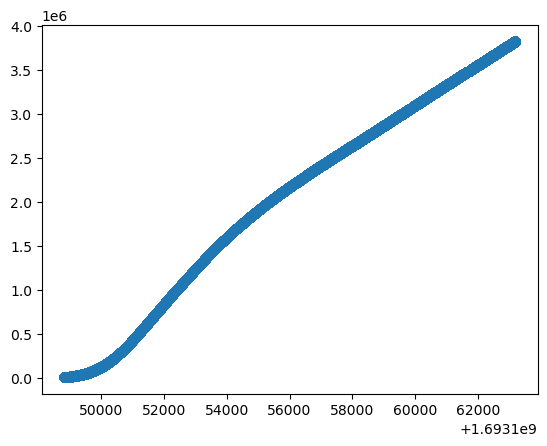

In [30]:
tpd = df[ (df['event_time']>1693148827) & (df['event_time']<1693163500 )]
plt.scatter(tpd['event_time'],tpd['layer00_event_count'])

# Clean the DF: we have a panda dataframe.

In [31]:
temp_df = df[ (df['event_time']>1693148827) & (df['event_time']<1693163500 )].copy()

In [32]:
sel_df = temp_df.sort_values(by='event_time')

In [33]:
sel_df['event_time'] = pd.to_datetime(sel_df['event_time'],unit='s')

In [34]:
# grouped_df = df.groupby(pd.Grouper(key="event_time", freq='5s')).agg({'event_time':'first','value':'mean'})
grouped_df = sel_df.groupby(pd.Grouper(key='event_time',freq='10s')).agg({
    'event_time':'first',
    **{col: 'mean' for col in sel_df.columns if col.endswith('event_count')}, 
    **{col: 'mean' for col in sel_df.columns if col.endswith('live_time')}
})
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1438 entries, 2023-08-27 15:07:00 to 2023-08-27 19:06:30
Freq: 10S
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   event_time           1414 non-null   datetime64[ns]
 1   layer00_event_count  1414 non-null   float64       
 2   layer01_event_count  1414 non-null   float64       
 3   layer02_event_count  1414 non-null   float64       
 4   layer03_event_count  1414 non-null   float64       
 5   layer04_event_count  1414 non-null   float64       
 6   layer05_event_count  1414 non-null   float64       
 7   layer06_event_count  1414 non-null   float64       
 8   layer07_event_count  1414 non-null   float64       
 9   layer09_event_count  1414 non-null   float64       
 10  layer00_live_time    1414 non-null   float64       
 11  layer01_live_time    1414 non-null   float64       
 12  layer02_live_time    1414 non-null   float64

Text(0.5, 1.0, 'L9')

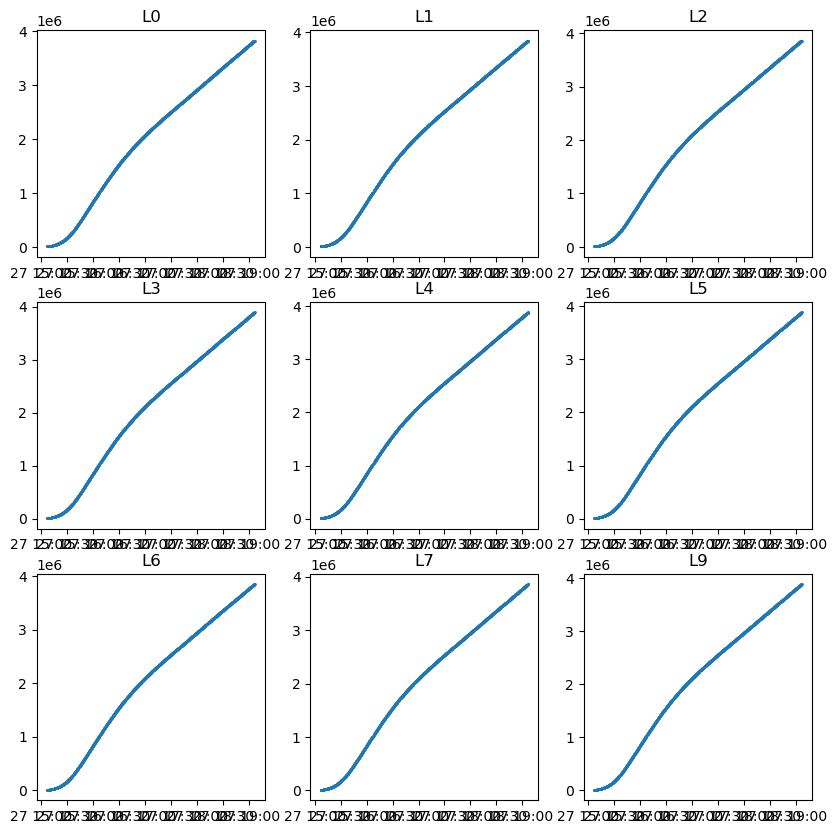

In [35]:
fig, axs = plt.subplots(3,3, figsize=(10,10))
axs[0,0].scatter(grouped_df['event_time'],grouped_df['layer00_event_count'],s=1)
axs[0,0].set_title('L0')

axs[0,1].scatter(grouped_df['event_time'],grouped_df['layer01_event_count'],s=1)
axs[0,1].set_title('L1')

axs[0,2].scatter(grouped_df['event_time'],grouped_df['layer02_event_count'],s=1)
axs[0,2].set_title('L2')

axs[1,0].scatter(grouped_df['event_time'],grouped_df['layer03_event_count'],s=1)
axs[1,0].set_title('L3')

axs[1,1].scatter(grouped_df['event_time'],grouped_df['layer04_event_count'],s=1)
axs[1,1].set_title('L4')

axs[1,2].scatter(grouped_df['event_time'],grouped_df['layer05_event_count'],s=1)
axs[1,2].set_title('L5')

axs[2,0].scatter(grouped_df['event_time'],grouped_df['layer06_event_count'],s=1)
axs[2,0].set_title('L6')

axs[2,1].scatter(grouped_df['event_time'],grouped_df['layer07_event_count'],s=1)
axs[2,1].set_title('L7')

axs[2,2].scatter(grouped_df['event_time'],grouped_df['layer09_event_count'],s=1)
axs[2,2].set_title('L9')


# Get each event count. 

In [36]:
ndf = pd.DataFrame()
ndf['time'] = grouped_df['event_time']
ndf['ep_time'] = ndf['time'].astype(int) // 10**9
ndf['l0_cnt'] = grouped_df['layer00_event_count'].diff()/10.0
ndf['l1_cnt'] = grouped_df['layer01_event_count'].diff()/10.0
ndf['l2_cnt'] = grouped_df['layer02_event_count'].diff()/10.0
ndf['l3_cnt'] = grouped_df['layer03_event_count'].diff()/10.0
ndf['l4_cnt'] = grouped_df['layer04_event_count'].diff()/10.0
ndf['l5_cnt'] = grouped_df['layer05_event_count'].diff()/10.0
ndf['l6_cnt'] = grouped_df['layer06_event_count'].diff()/10.0
ndf['l7_cnt'] = grouped_df['layer07_event_count'].diff()/10.0
ndf['l9_cnt'] = grouped_df['layer09_event_count'].diff()/10.0

ndf['tot_rate'] =  ndf.filter(like='cnt').sum(axis=1)
ndf['avg_rate'] =  ndf.filter(like='cnt').mean(axis=1)

### Extract altitude

In [37]:
exdf = pd.read_excel(excel_path, header=0, skiprows=[1])
# Display the DataFrame (optional)
exdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date Time                  2264 non-null   datetime64[ns]
 1   MKS High Sensor:           2264 non-null   float64       
 2   MKS Mid Sensor:            2264 non-null   float64       
 3   MKS Low Sensor:            2264 non-null   float64       
 4   MKS High Sensor Altitude:  2264 non-null   float64       
 5   MKS Mid  Sensor Altitude:  2264 non-null   float64       
 6   MKS Low  Sensor Altitude:  1161 non-null   float64       
 7   MKS Hi:                    2264 non-null   int64         
 8   MKS Mid:                   2264 non-null   int64         
 9   MKS Lo:                    2264 non-null   int64         
 10  GPS Altitude:              2264 non-null   float64       
 11  GPS Velocity UP:           2264 non-null   int64         
 12  GPS St

In [38]:
exdf['datetime'] = pd.to_datetime(exdf['Date Time'], format='%Y-%m-%d %H:%M:%S')
exdf['altitude'] = pd.to_numeric( exdf['GPS Altitude:'], errors='coerce')
exdf['epoch_dt'] = exdf['datetime'].astype(int) // 10**9

In [39]:
f=np.interp(ndf['ep_time'][...], exdf['epoch_dt'], exdf['altitude'])
f.shape

(1438,)

In [40]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1438 entries, 2023-08-27 15:07:00 to 2023-08-27 19:06:30
Freq: 10S
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      1414 non-null   datetime64[ns]
 1   ep_time   1438 non-null   int64         
 2   l0_cnt    1406 non-null   float64       
 3   l1_cnt    1406 non-null   float64       
 4   l2_cnt    1406 non-null   float64       
 5   l3_cnt    1406 non-null   float64       
 6   l4_cnt    1406 non-null   float64       
 7   l5_cnt    1406 non-null   float64       
 8   l6_cnt    1406 non-null   float64       
 9   l7_cnt    1406 non-null   float64       
 10  l9_cnt    1406 non-null   float64       
 11  tot_rate  1438 non-null   float64       
 12  avg_rate  1406 non-null   float64       
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 157.3 KB


In [41]:
ndf['altitude'] = f

Text(0.5, 0, 'Time (datetime)')

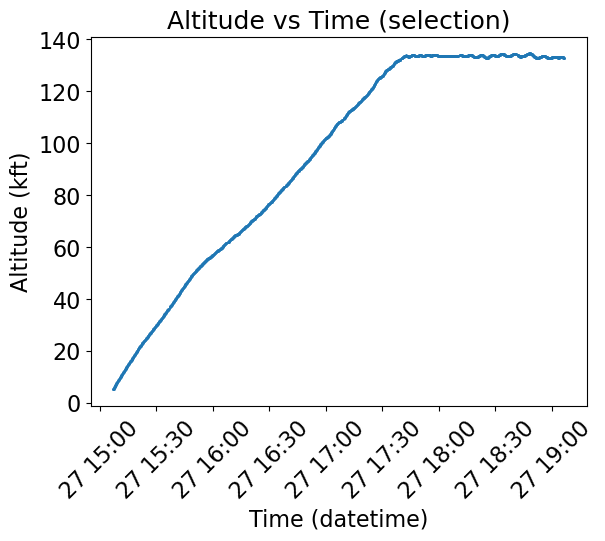

In [42]:
plt.scatter(ndf['time'],ndf['altitude']/1000, s=1)
plt.xticks( rotation=45, fontsize=16)
plt.yticks( fontsize = 16)
# Set the plot title
plt.title("Altitude vs Time (selection)", fontsize ='18')
plt.ylabel('Altitude (kft)', fontsize='16')
plt.xlabel('Time (datetime)',fontsize='16')

Text(0.5, 0, 'datetime')

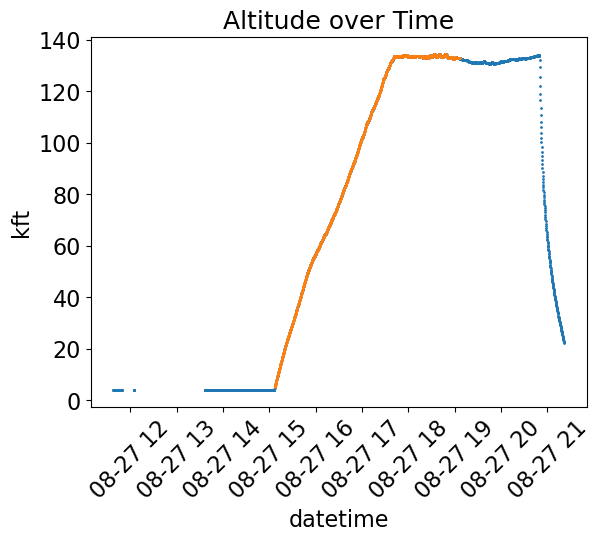

In [43]:
plt.scatter(exdf['datetime'],exdf['altitude']/1000, s=1)
plt.scatter(ndf['time'],ndf['altitude']/1000, s=1, marker='x' )
plt.xticks( rotation=45, fontsize=16)
plt.yticks( fontsize = 16)

# Set the plot title
plt.title("Altitude over Time", fontsize ='18')
plt.ylabel('kft', fontsize='16')
plt.xlabel('datetime',fontsize='16')

Text(0.5, 0, 'datetime')

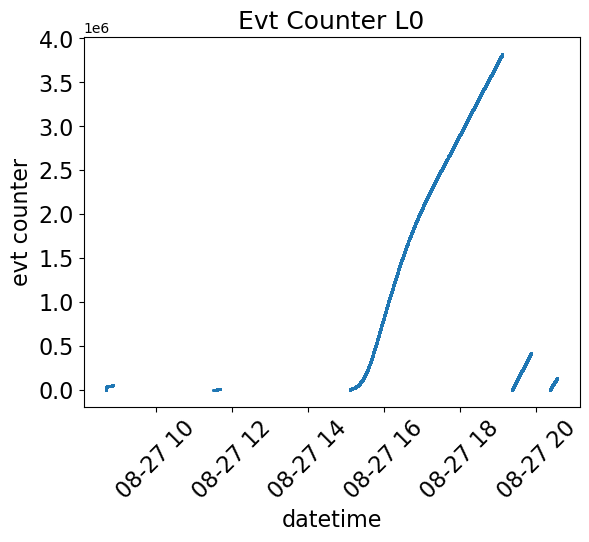

In [44]:
tempdf = pd.DataFrame(df[['event_time','layer00_event_count']])
tempdf['time']=pd.to_datetime(tempdf['event_time'],unit='s')
plt.scatter(tempdf['time'],tempdf['layer00_event_count'], s=1)
plt.xticks( rotation=45, fontsize=16)
plt.yticks( fontsize = 16)
# Set the plot title
plt.title("Evt Counter L0", fontsize ='18')
plt.ylabel('evt counter', fontsize='16')
plt.xlabel('datetime',fontsize='16')

Text(0.5, 1.0, 'L9')

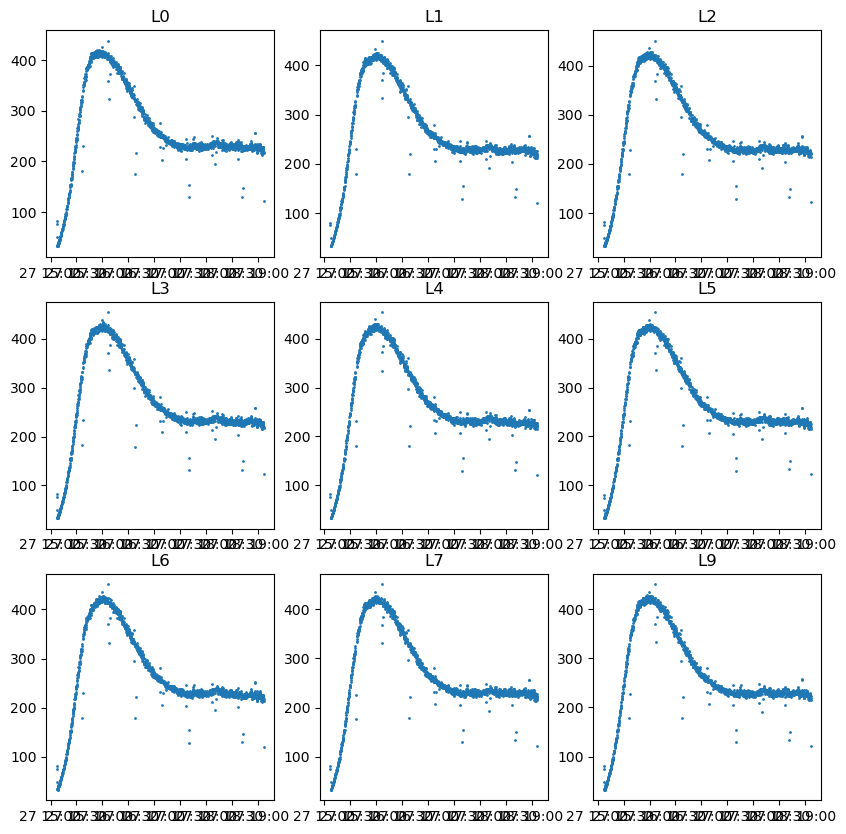

In [45]:
fig, axs = plt.subplots(3,3, figsize=(10,10))
axs[0,0].scatter(ndf['time'],ndf['l0_cnt'],s=1)
axs[0,0].set_title('L0')

axs[0,1].scatter(ndf['time'],ndf['l1_cnt'],s=1)
axs[0,1].set_title('L1')

axs[0,2].scatter(ndf['time'],ndf['l2_cnt'],s=1)
axs[0,2].set_title('L2')

axs[1,0].scatter(ndf['time'],ndf['l3_cnt'],s=1)
axs[1,0].set_title('L3')

axs[1,1].scatter(ndf['time'],ndf['l4_cnt'],s=1)
axs[1,1].set_title('L4')

axs[1,2].scatter(ndf['time'],ndf['l5_cnt'],s=1)
axs[1,2].set_title('L5')

axs[2,0].scatter(ndf['time'],ndf['l6_cnt'],s=1)
axs[2,0].set_title('L6')

axs[2,1].scatter(ndf['time'],ndf['l7_cnt'],s=1)
axs[2,1].set_title('L7')

axs[2,2].scatter(ndf['time'],ndf['l2_cnt'],s=1)
axs[2,2].set_title('L9')


In [46]:
# We select the float time. which was Timestamp('2023-08-27 15:07:07'), 1693148827) from the CSV file

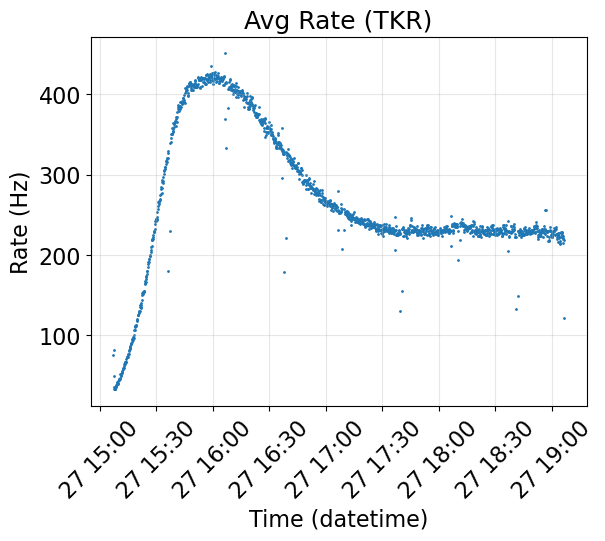

In [51]:
plt.scatter(ndf['time'],ndf['avg_rate'],s=1)

plt.xticks( rotation=45, fontsize=16)
plt.yticks( fontsize = 16)

# Set the plot title
plt.title("Avg Rate (TKR)", fontsize ='18')
plt.ylabel('Rate (Hz)', fontsize='16')
plt.xlabel('Time (datetime)',fontsize='16')
plt.grid(True,alpha=0.3)

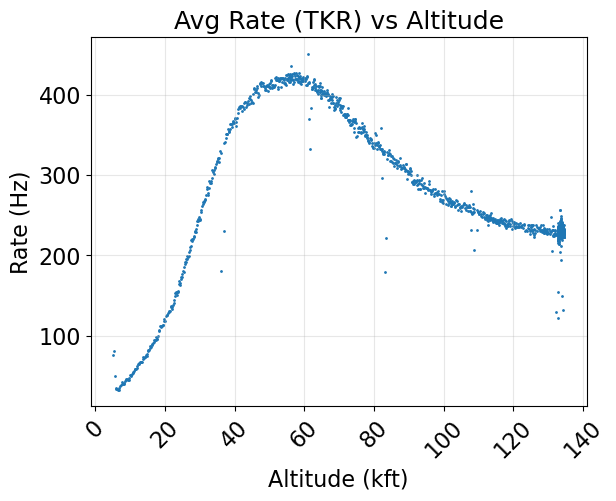

In [52]:
plt.scatter(ndf['altitude']/1000,ndf['avg_rate'],s=1)
plt.xticks( rotation=45, fontsize=16)
plt.yticks( fontsize = 16)

# Set the plot title
plt.title("Avg Rate (TKR) vs Altitude", fontsize ='18')
plt.ylabel('Rate (Hz)', fontsize='16')
plt.xlabel('Altitude (kft)',fontsize='16')
plt.grid(True,alpha=0.3)

Text(0.5, 0, 'Time (datetime)')

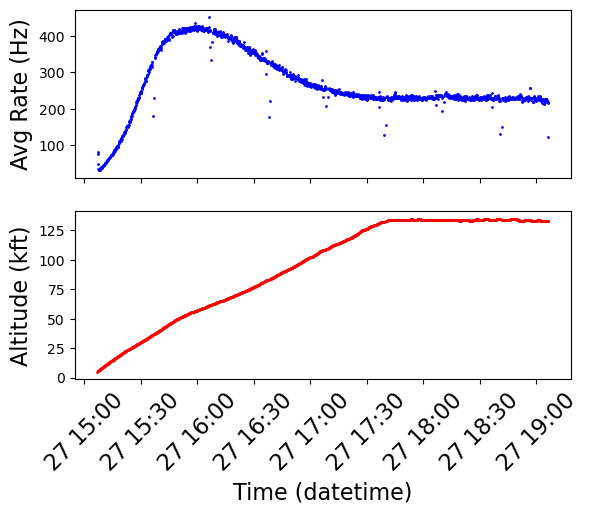

In [49]:
fig, ax = plt.subplots(2, sharex=True)

x = ndf['time']
y1 = ndf['avg_rate']
y2 = ndf['altitude']/1000

ax[0].scatter(x, y1, c='b', s=1)
ax[0].set_ylabel('Avg Rate (Hz)',fontsize = 16)

ax[1].scatter(x, y2, c='r', s=1)
ax[1].set_ylabel('Altitude (kft)',fontsize = 16)
# Get the shared x axis object
# Get the shared x axis object
# shared_x_axis = ax[0].get_shared_x_axes()[0]

# # Set the rotation and fontsize of the ticks for the shared x axis object
# shared_x_axis.set_xticks(rotation=45, fontsize=16)
plt.xticks( rotation=45, fontsize=16)
# Set the x axis label
plt.xlabel('Time (datetime)', fontsize=16)


In [50]:
gdf = gpd.GeoDataFrame(exdf,geometry=gpd.points_from_xy(exdf['GPS Latitude:'], exdf['GPS Longitude:']))

Text(0.5, 1.0, 'Map of Points')

<Figure size 1000x1000 with 0 Axes>

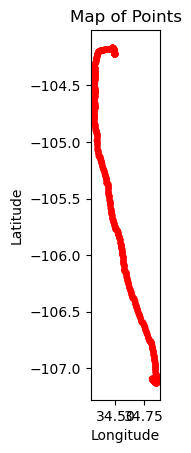

In [47]:
# from mpl_toolkits.basemap import Basemap
# m=Basemap()
plt.figure(figsize=(10, 10))
gdf.plot(color='red', marker='.')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map of Points')

### Sel: Above 5k altitutde

### Sel: Sort by time (just in case)

In [48]:
sel_df = temp_df.sort_values(by='event_time')

# Group 

In [49]:
import pandas as pd

# Assuming you have a DataFrame named df with columns 'event_time' and 'layer00_event_count'
sel_df['eventtime_seconds'] = (sel_df['event_time']).astype(int)

# Group by the common time column and aggregate the data
grouped_df = sel_df.groupby('eventtime_seconds').agg({
    **{col: 'mean' for col in sel_df.columns if col.endswith('event_count')}, 
    **{col: 'mean' for col in sel_df.columns if col.endswith('live_time')}
})
grouped_df = grouped_df.reset_index()
grouped_df['total_event_count'] = grouped_df.filter(like='event_count').sum(axis=1)

In [50]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14052 entries, 0 to 14051
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   eventtime_seconds    14052 non-null  int64  
 1   layer00_event_count  14052 non-null  float64
 2   layer01_event_count  14052 non-null  float64
 3   layer02_event_count  14052 non-null  float64
 4   layer03_event_count  14052 non-null  float64
 5   layer04_event_count  14052 non-null  float64
 6   layer05_event_count  14052 non-null  float64
 7   layer06_event_count  14052 non-null  float64
 8   layer07_event_count  14052 non-null  float64
 9   layer09_event_count  14052 non-null  float64
 10  layer00_live_time    14052 non-null  float64
 11  layer01_live_time    14052 non-null  float64
 12  layer02_live_time    14052 non-null  float64
 13  layer03_live_time    14052 non-null  float64
 14  layer04_live_time    14052 non-null  float64
 15  layer05_live_time    14052 non-null 

In [51]:
grouped_df['tot_evt_count']= grouped_df['total_event_count'].diff()

# NOTES     
> event count, livetime, running time, system time, triggering condition

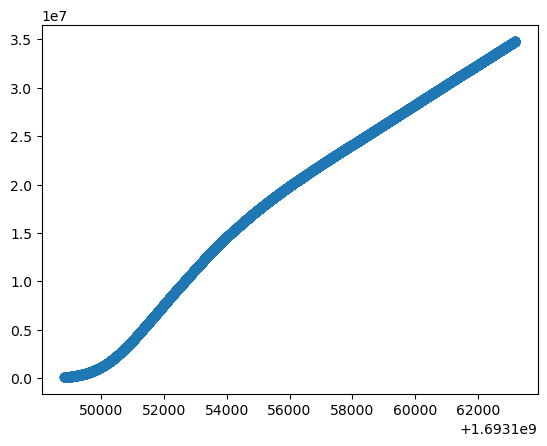

In [52]:

plt.scatter(grouped_df['eventtime_seconds'],grouped_df['total_event_count'])


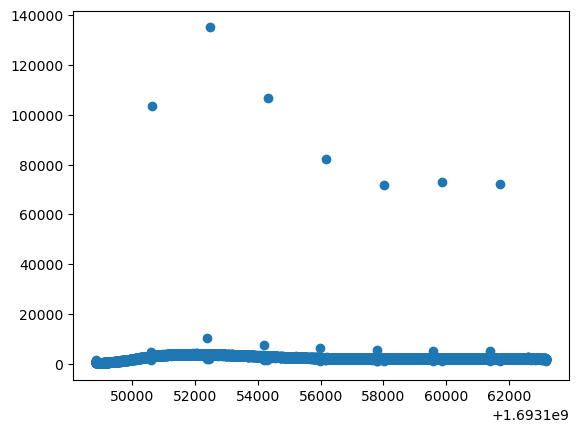

In [53]:
filt_df = grouped_df[grouped_df['tot_evt_count']>0]
plt.scatter(filt_df['eventtime_seconds'],filt_df['tot_evt_count'])

### Verify Time

In [54]:
from datetime import datetime, timezone
import time
# Your time as a number (replace this with your actual time value)
time_number = 1693125679.566760353
# 1677649427.123456789  # Example time value

# Split the number into seconds and nanoseconds
seconds = int(time_number)
nanoseconds = int((time_number - seconds) * 1e9)

# Create a datetime object with UTC timezone
utc_time = datetime.utcfromtimestamp(seconds).replace(microsecond=nanoseconds // 1000, tzinfo=timezone.utc)

# Print the UTC time with nanoseconds precision
print("UTC time from the provided number:", utc_time)


UTC time from the provided number: 2023-08-27 08:41:19.566760+00:00


In [55]:
# Get the current UTC time
current_utc_time = datetime.utcnow().replace(tzinfo=timezone.utc)

# Convert UTC time to seconds since the epoch
seconds_since_epoch = int(current_utc_time.timestamp())

# Add nanoseconds precision
nanoseconds = current_utc_time.microsecond * 1000
time_number = seconds_since_epoch + nanoseconds / 1e9

# Print the resulting time number
print("Current UTC time as a number:", time_number)

Current UTC time as a number: 1700235971.98189


In [56]:
from datetime import datetime, timezone

# Provided time as seconds with nanoseconds precision
time_seconds = 1693125679439985443 / 1e9

# Split seconds into integer part and nanoseconds
seconds = int(time_seconds)
nanoseconds = int((time_seconds - seconds) * 1e9)

# Create a datetime object with UTC timezone
utc_time = datetime.utcfromtimestamp(seconds).replace(microsecond=nanoseconds // 1000, tzinfo=timezone.utc)

# Print the UTC time
print("UTC time:", utc_time)

UTC time: 2023-08-27 08:41:19.439985+00:00


In [57]:
df = pd.read_excel(excel_path)

# Display the DataFrame (optional)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date Time                  2265 non-null   object 
 1   MKS High Sensor:           2265 non-null   object 
 2   MKS Mid Sensor:            2265 non-null   object 
 3   MKS Low Sensor:            2265 non-null   object 
 4   MKS High Sensor Altitude:  2265 non-null   object 
 5   MKS Mid  Sensor Altitude:  2265 non-null   object 
 6   MKS Low  Sensor Altitude:  1162 non-null   object 
 7   MKS Hi:                    2265 non-null   object 
 8   MKS Mid:                   2265 non-null   object 
 9   MKS Lo:                    2265 non-null   object 
 10  GPS Altitude:              2265 non-null   object 
 11  GPS Velocity UP:           2265 non-null   object 
 12  GPS Status Byte 1:         2265 non-null   object 
 13  GPS Status Byte 2:         2265 non-null   objec

# Investigate the file vs time vs altitude

In [58]:
matching_files

['/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/CPU_data/230827/tracker/1693125677_L2.h5',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/CPU_data/230827/tracker/1693135845_L2.h5',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/CPU_data/230827/tracker/1693148789_L2.h5',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/CPU_data/230827/tracker/1693150591_L2.h5',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/CPU_data/230827/tracker/1693152391_L2.h5',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/CPU_data/230827/tracker/1693154191_L2.h5',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/CPU_data/230827/tracker/1693155991_L2.h5',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/CPU_data/230827/tracker/1693157791_L2.h5',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/CPU_data/230827/tracker/1693159591_L2.h5',
 

In [65]:
time_min = []
time_max = []
mat_file = []
for tfile in matching_files:
    with h5py.File(tfile,'r') as file:
        mat_file.append(tfile)
        sync_ind = file[f'layer00/data/sync_index'][...]
        event_time = file[f'layer00/data/system_time'][...][sync_ind]/1e9

        epoch_times = [event_time[0],event_time[1],event_time[2],event_time[-1],event_time[-2]]
        start = datetime.utcfromtimestamp(event_time[0])
        end   =  datetime.utcfromtimestamp(event_time[-1])
        time_min.append(start)
        time_max.append(end)
        # layer_data['event_time'] = np.concatenate([layer_data['event_time'], event_time])
        # layer_data['event_id'] = np.concatenate([layer_data['event_id'], event_id])

In [66]:
time_min, time_max, mat_file

([datetime.datetime(2023, 8, 27, 8, 41, 19, 439986),
  datetime.datetime(2023, 8, 27, 11, 30, 47, 220629),
  datetime.datetime(2023, 8, 27, 15, 6, 31, 680789),
  datetime.datetime(2023, 8, 27, 15, 36, 33, 119978),
  datetime.datetime(2023, 8, 27, 16, 6, 33, 447581),
  datetime.datetime(2023, 8, 27, 16, 36, 33, 448218),
  datetime.datetime(2023, 8, 27, 17, 6, 33, 362163),
  datetime.datetime(2023, 8, 27, 17, 36, 33, 463574),
  datetime.datetime(2023, 8, 27, 18, 6, 33, 564922),
  datetime.datetime(2023, 8, 27, 18, 36, 33, 619901),
  datetime.datetime(2023, 8, 27, 19, 21, 39, 514963),
  datetime.datetime(2023, 8, 27, 20, 21, 13, 544787)],
 [datetime.datetime(2023, 8, 27, 8, 51, 48, 825617),
  datetime.datetime(2023, 8, 27, 11, 41, 16, 834006),
  datetime.datetime(2023, 8, 27, 15, 36, 31, 22838),
  datetime.datetime(2023, 8, 27, 16, 6, 31, 19028),
  datetime.datetime(2023, 8, 27, 16, 36, 31, 24319),
  datetime.datetime(2023, 8, 27, 17, 6, 31, 27920),
  datetime.datetime(2023, 8, 27, 17, 36

Text(0.5, 0, 'Time (datetime)')

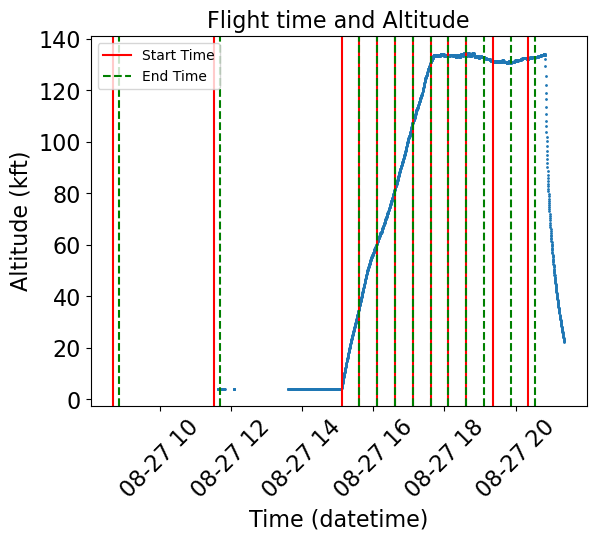

In [109]:
from matplotlib.legend_handler import HandlerLine2D

plt.scatter(exdf['datetime'],exdf['altitude']/1000, s=1)
# Add a vertical line at x=3
for time in time_min:
    plt.axvline(x=time, color='red')

for time in time_max:
    plt.axvline(x=time, color='green', linestyle='--')

legend_handles = [
    plt.Line2D([0], [0],  color='red', label='Start Time'),
    plt.Line2D([0], [0], linestyle='--', color='green', label='End Time'),
]
plt.legend(handles=legend_handles, handler_map={plt.Line2D: HandlerLine2D()}, loc='upper left')

plt.title('Flight time and Altitude',fontsize='16')
plt.xticks( rotation=45, fontsize=16)
plt.yticks( fontsize = 16)
# Set the plot title
plt.ylabel('Altitude (kft)', fontsize='16')
plt.xlabel('Time (datetime)',fontsize='16')